# Imports

In [1]:
from datetime import timedelta
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

from icedef import iceberg, metocean, drift_simulation
from icedef.turnbull import drift

# Iceberg

In [2]:
iip_season = 2015
max_hours = 24

iip_df = iceberg.get_dense_df(iip_season, max_hours)

track_num = 0
iip_berg_df = iip_df.loc[iip_df['track_num'] == track_num]

iip_berg = iceberg.get_iip_berg(iip_berg_df)

/home/evankielley/IceDEF/icedef/iceberg.py:403: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  iip_df2['count'] = iip_df2.groupby('ICEBERG_NUMBER')['ICEBERG_NUMBER'].transform('count')


# Metocean

In [3]:
ocean_data = metocean.ECMWFOcean(min(iip_berg.history['X']), max(iip_berg.history['X']),
                         min(iip_berg.history['Y']), max(iip_berg.history['Y']),
                         iip_berg.history['T'][0], iip_berg.history['T'][-1])

ocean_data.filenames

['20150310.nc', '20150311.nc']

In [4]:
atm_data = metocean.ECMWFAtm(min(iip_berg.history['X']), max(iip_berg.history['X']),
                         min(iip_berg.history['Y']), max(iip_berg.history['Y']),
                         iip_berg.history['T'][0], iip_berg.history['T'][-1])

atm_data.filenames

['20150310.nc', '20150311.nc']

# Drift Simulation

In [5]:
sim = drift_simulation.DriftSimulation(iip_berg, ocean_data, atm_data, drift)

In [6]:
sim.euler(0.1*3600, 100)
#sim.rk2(0.1*3600, 100)

# Plot

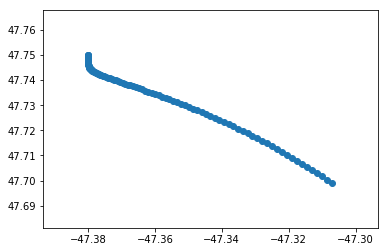

In [7]:
plt.scatter(sim.history['x'], sim.history['y'])
plt.show()

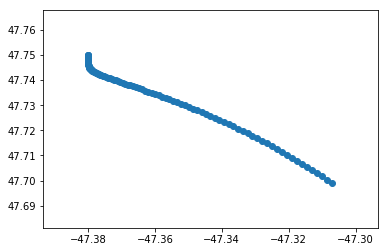

In [8]:
plt.scatter(sim.history['x'], sim.history['y'])
plt.show()

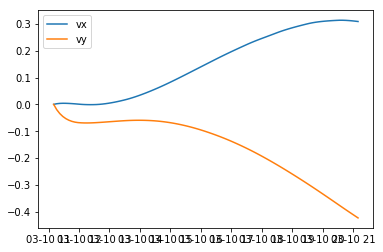

In [11]:
plt.plot(sim.history['t'], sim.history['vx'], label='vx')
plt.plot(sim.history['t'], sim.history['vy'], label='vy')
plt.legend()
plt.show()